# Funciones

Una función es un bloque de código solo se ejecuta cuando es invocada.

## Declaración e invocación de funciones

En python las funciones se declaran usando la palabra clave *def* junto con el nombre de la función y sus parámetros entre paréntesis. Para invocar dichas funciones simplemente escribimos su nombre y especificamos los valores de los parámetros entre paréntesis:

In [1]:
def mifuncion():
    print("Esto es una función que se ha ejecutado")

mifuncion()

Esto es una función que se ha ejecutado


En python las funciones son ciudadanos de primer nivel del lenguaje, y por tanto, podemos asignar funciones a variables y operar con ellas.

In [2]:
variableconfuncion=mifuncion

variableconfuncion()

Esto es una función que se ha ejecutado


## Parámetros

Las funciones en python admiten parámetros para proporcionar información a la función:


In [4]:
def miotrafuncion(fname):
  print(fname + " Refsnes")

miotrafuncion("Emil")
miotrafuncion("Tobias")
miotrafuncion("Linus") 

Emil Refsnes
Tobias Refsnes
Linus Refsnes


En python los parámetros se especifican por orden de declaración o bien por nombre al invocar la función (evidentemente cada parámetro debe tener un nombre distinto):

In [7]:
def divide(dividendo,divisor):
    return dividendo/divisor

print(divide(3, 2))
print(divide(divisor=2,dividendo=3))

1.5
1.5


Sin embargo, no es posible pasar un argumento por nombre antes que uno que no sea pasado por nombre, una vez empezamos a pasar los parámetros por nombre, todos los parámetros deberán ser pasados por nombre:

In [10]:
print(divide(3,divisor=2))

1.5


In [11]:
print(divide(divisor=2,3)) # Esto generará un error de sintaxis del lenguaje en la invocación a la función

SyntaxError: positional argument follows keyword argument (Temp/ipykernel_4592/1411486055.py, line 1)

Pueden declararse parámetros como opcionales indicando un valor por defecto al decarar la función:

In [13]:
def divide(dividendo,divisor=1):   # El valor por defecto para el divisor es 1
    return dividendo/divisor

print(divide(3, 2))
print(divide(divisor=2,dividendo=3))
print(divide(3))

1.5
1.5
3.0


Cuando los parámetros son variables de los tipos básicos del lenguaje, los parámetros se pasan por copia, y por tanto, las modificaciones que hagamos en el interior de la función no se reflejarán fuera de la misma:

In [19]:
x=4
def cambiar(param):
    print("---------DENTRO---------")
    print(param)
    param=2
    print(param)
cambiar(x)
print("---------FUERA---------")
print(x)


---------DENTRO---------
4
2
---------FUERA---------
4


Sin embargo, cuando los parámetros son objetos o colecciones mutables, los parámetros se paran por referencia, y por tanto, los cambios que realicemos dentro de la función se reflejarán fuera de ella.

In [22]:
x=["no puedo", "al ataqueeer"]
def cambiar(lista):
    print("---------DENTRO---------")
    print(lista)
    lista[1]="Hasta luego Lucas!"
    print(lista)
cambiar(x)
print("---------FUERA---------")
print(x)

---------DENTRO---------
['no puedo', 'al ataqueeer']
['no puedo', 'Hasta luego Lucas!']
---------FUERA---------
['no puedo', 'Hasta luego Lucas!']


Podemos deinir funciones con un número arbitrario de argumentos, declarando un parámetro cuyo combre comienza por *:

In [32]:
def imprimir(*args):
    print(args)
    
imprimir("hola","mundo")
imprimir("Esto", "Es",1,"prueba") # ¿de que tipo créeis que sera el parámetro args?

('hola', 'mundo')
('Esto', 'Es', 1, 'prueba')


## Ámbito de una función

Las funciones admiten que declaremos variables en su interior, pero estas variables solamente estarán definidas en el contexto de la propia función, y no podremos usarlas desde fuera:

In [25]:
def areaCirculo(radio):
    pi=3.14159
    return pi*radio*radio

print(areaCirculo(1))
print(areaCirculo(2))
print(pi)

3.14159
12.56636


NameError: name 'pi' is not defined

Esta limitación afecta también a las funciones que definamos a su vez dentro de la propia función:

In [28]:
def areaCirculo(radio):
    def cuadrado(valor):
        return valor*valor
    pi=3.14159
    return pi*cuadrado(radio)

print(areaCirculo(2))
print(cuadrado(2))


12.56636


NameError: name 'cuadrado' is not defined

## Funciones recursivas

En python podemos declarar funciones recursivas, que son funciones que se invocan a sí misma como uno de sus pasos. Es importante tener cuidado cuando definimos funciones recursivas puesto que es muy fácil generar un bucle infinito de llamadas:

In [39]:
def conteo(n):
    if(n>0):
        print(n)
        conteo(n-1)
    else:
        print("Stop!")
        
conteo(5)
              
    

5
4
3
2
1
Stop!


## Expresiones lambda:

Podemos definir una expresión lambda como una función anónima que usamos puntualmente. La sintaxis que se siguen para declararlas es *lambda parámetros : expresión*. Ejemplo:



In [36]:
x = lambda a : a + 10
print(x(5)) 

15


In [37]:
x = lambda a, b, c : a + b + c
print(x(5, 6, 2)) 

13


Las funciones lambda en python adquiren todo su interés cuando se combinan con las siguientes funciones del lenguaje:
- *filter*: permite filtrar los elementos de una colección en base a una expresión lambda que evalua a un valor booleano.
- *map*: permite transformar los elementos de una colección y obtener otra colección en base a la aplicación secuencial de la expresión lambda a los elementos.
- *reduce*: permite agregar en un único resultado el cómputo asociado a todos los elementos de un colección.

Por ejemplo, para el filtrado:

In [41]:
#Defining the list
example_lst = (5, 21, 72, 102, 16, 123, 65, 85, 19, 90)  

# Passing the lambda function
divisible_lst = list(filter(lambda i:(i%3 == 0),example_lst))

print(divisible_lst)

# Passing the second lambda function
greater_lst = list(filter(lambda i:(i>50), example_lst))

print(greater_lst)

[21, 72, 102, 123, 90]
[72, 102, 123, 65, 85, 90]


Ejemplo de uso del mapeo con expresiones lambda:

In [42]:
# Defining the list
example_lst = (5, 21, 72, 102, 16, 123, 65, 85, 19, 90)  

# Passing the lambda function
duble_lst = (list(map(lambda i:i*2, example_lst)))
print(duble_lst)

# Passing the second lambda function
square_lst = (list(map(lambda i:i*i, example_lst)))
print(square_lst)

[10, 42, 144, 204, 32, 246, 130, 170, 38, 180]
[25, 441, 5184, 10404, 256, 15129, 4225, 7225, 361, 8100]


La función reduce forma parte del paquete functools, por lo que es necesario importar dicho paquete para poder usarla:

In [43]:
from functools import reduce

# Defining the list
example_lst = (5, 21, 72, 102, 16, 123, 65, 85, 19, 90)  

# Passing the lambda function
sum_lst = reduce((lambda i,j: i+j), example_lst)

print(sum_lst)

# Passing the second lambda function
max_value = reduce((lambda i,j: i if i>j else j), example_lst)

print("The Greatest Number of the List is: ", end="")

print(max_value)

598
The Greatest Number of the List is: 123


En el fondo, el mejor uso de las expresiones lambda en Python es definir funciones ortas de un solo uso. Por lo tanto, si el código se vuelve demasiado complejo, es mejor evitarlas.

Aunque se puede escribir un código complejo en una sola línea con expresiones lambda, se recomienda definir una función regular en estos casos para que el código sea más sencillo y fácil de entender.

También se recomienda evitar las expresiones lambda en Python si necesitas lanzar una excepción o definir una variale para realizar el cálculo.



# Ejercicios:

## Ejercicio 1:

Escriba una función recursiva que permita calcular la sucesión de fibonacci hasta el enésimo valor (donde n es un parámetro de la función). Imprima el valor de n capturado de la entrada del usuario mediante el código que se proporciona:

In [51]:
n=int(input("Indique el número de la sucesión de fibonacci que desea obtener:"))
def fibonaccif(n):
    if n==1:
        return 0;
    elif n==2:
        return 1;
    else:
        return fibonaccif(n-1)+fibonaccif(n-2)
print(fibonaccif(n))

Indique el número de la sucesión de fibonacci que desea obtener: 5


3


## Ejercicio 2: 

Implemente un código similar al anterior que devuelva la sucesión completa hasta el valor n como una lista usando una expresión lambda y la función reduce.

In [52]:
n=int(input("Indique los números de la sucesión de fibonacci que desea obtener:"))

fibonacci = lambda n: reduce(lambda x, _: x+[x[-1]+x[-2]],
                                range(n-2), [0, 1])
print(fibonacci(n))

Indique los números de la sucesión de fibonacci que desea obtener: 8


[0, 1, 1, 2, 3, 5, 8, 13]


## Ejercicio 3:

Implemente un código en python mediante expresiones lambda que permita encontrar la parte común de dos arrays, pruébelo con los datos que se proporcionan a continuación:

In [53]:
array_nums1 = [1, 2, 3, 5, 7, 8, 9, 10]
array_nums2 = [1, 2, 4, 8, 9]
print("Original arrays:")
print(array_nums1)
print(array_nums2)
# Solución:
result = list(filter(lambda x: x in array_nums1, array_nums2)) 
print ("\nIntersection of the said arrays: ",result)

Original arrays:
[1, 2, 3, 5, 7, 8, 9, 10]
[1, 2, 4, 8, 9]

Intersection of the said arrays:  [1, 2, 8, 9]


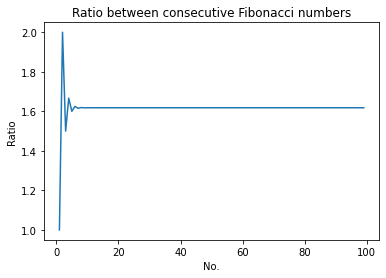

In [1]:
import matplotlib.pyplot as plt
def draw_fibo(n):
    ratio = []
    num = []
    # Starting values
    a = 0
    b = 1
    for i in range(1, n):
        c = a + b
        num.append(i)
        ratio.append(c / b)
        a = b
        b = c
    draw_graph(num, ratio)


def draw_graph(x, y):
    plt.plot(x, y)
    plt.xlabel('No.')

    plt.ylabel('Ratio')
    plt.title('Ratio between consecutive Fibonacci numbers')
    
draw_fibo(100)